## NLP - Lesson 1

In Natural Language Processing, the idea is to learn patterns and form insights from textual data using a computer. But as computers cannot understand the text directly, we have to convert the text into numerical data which then can be used as an input to traditional and modern models. Machine learning algorithms can handle any dimension of textual data when converted to numerical data using techniques like word embeddings, for example word2vec. I am writing this notebook to teach myself, and possibly others, these techniques from scratch and also using famous python libraries.

### Libraries import

In [18]:
import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [15]:
pd.set_option('display.max_colwidth',-1)

### Data - Twitter Disaster Classification

I have downloaded this data from Kaggle from the **Twitter Disaster Classification** competition.
Source - [Twitter Disaster Classification](https://www.kaggle.com/competitions/nlp-getting-started/overview)

In [2]:
data = pd.read_csv("./data/train.csv")
data.head(3)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1


### Exploratory Data Analysis

Let's explore the data to see what kind of columns are available for us to use. The main problem we are trying to work on in this is sentiment analysis to understand if the tweet corresponds to a disaster or not. Here, disaster would mean anything negative. Further breakdown of a tweet being a life threatening disaster or not could be subjective. So, we will use machine learning techniques to give an elementary analysism of a tweet being negative or positive.

In [3]:
data.columns

Index(['id', 'keyword', 'location', 'text', 'target'], dtype='object')

In [5]:
data.shape

(7613, 5)

In [6]:
data.isna().sum(), data.isna().sum()/data.shape[0]

(id             0
 keyword       61
 location    2533
 text           0
 target         0
 dtype: int64,
 id          0.000000
 keyword     0.008013
 location    0.332720
 text        0.000000
 target      0.000000
 dtype: float64)

In [8]:
data.nunique()

id          7613
keyword      221
location    3341
text        7503
target         2
dtype: int64

In [11]:
data['target'].value_counts()/data.shape[0]

0    0.57034
1    0.42966
Name: target, dtype: float64

In [12]:
data.groupby(['location']).size().to_frame('num_rows').sort_values('num_rows', ascending=False)

,num_rows
location,
USA,104
New York,71
United States,50
London,45
Canada,29
...,...
Hueco Mundo,1
"Hughes, AR",1
"Huntington, WV",1


### Text Preprocessing

In [17]:
data[['text','target']].sample(5)

,text,target
3180,Do you know the emergency plan at your workplace? If not ask your supervisor or operations manager. #Retail,0
4484,One Year on from the Sinjar Massacre #Yazidis Blast Lack of Action Over Hostages\nhttp://t.co/BAqOcMcJqc,1
6086,After a Few Years Afloat Pension Plans Start Sinking Again http://t.co/4cEEuzWHvf,1
5028,DORETTE THATS THE NAME OF THE MUDSLIDE CAKE MAKER,0
1081,I came up with an idea of a fragrance concept for a bath bomb called The Blood of my Enemies. So you can say that's what you bathe in.,1


We see that as text could contain a lot of extra words or symbols or even emoticons which doesn't necessarily add any relevance or emotion to the context, we should not be including them while teaching a model how to classify any textual data as positive or negative as it could only increase overhead on the model and machine to process additional data with little to no information addition.

## Step-by-Step guide

Let's explore the steps we will be using in text preprocessing.

1. Remove case sensitivity and remove symbols
2. Tokenization
3. Remove stop words
4. Stemming / Lemmatization

### 1. Remove case sensitivity and remove symbols

In [19]:
def clean_text(row,col):
    val = row[col]
    val = val.lower() ## removing case sensitivity
    val = re.compile(r'https?://\S+|www\.\S+').sub(r'',val) ## removing hyper-link information
    val = re.compile(r'[^a-zA-Z0-9]').sub(r' ',val).strip() ## keeping only alpha-numeric data and removing leading and trailing white spaces
    return val

In [20]:
data['cleaned_text'] = data.apply(clean_text,args=['text'],axis=1)

In [22]:
train_data = data[['text','cleaned_text','target']]
train_data.head(5)

,text,cleaned_text,target
0,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,our deeds are the reason of this earthquake may allah forgive us all,1
1,Forest fire near La Ronge Sask. Canada,forest fire near la ronge sask canada,1
2,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,all residents asked to shelter in place are being notified by officers no other evacuation or shelter in place orders are expected,1
3,"13,000 people receive #wildfires evacuation orders in California",13 000 people receive wildfires evacuation orders in california,1
4,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,just got sent this photo from ruby alaska as smoke from wildfires pours into a school,1


This shows that the text looks much better. There are no hashtags as we can see in the first and fifth row. However, removing periods (.) or commas may add problems with punctuations but we can target that later with more complex models (once I teach myself more about it xD)

### 2. Tokenzation

Tokenization is the first step to be used in any NLP use-case. The idea is to convert the raw text into word tokens or sentence tokens. We will convert the text into word-tokens for this use-case.

In [38]:
train_data['text_list'] = train_data['cleaned_text'].map(lambda x : x.split(' '))

In [39]:
train_data.sample(5)['text_list'].values

array([list(['fire', 'hazard', 'associated', 'with', 'installation', 'of', 'non', 'compliant', 'external', 'cladding', 'on', '', '', '', 'by']),
       list(['epicentre', '', '', 'cydia', 'tweak', '', '', '', '', '', 'thanks', 'to', '', 'phillipten']),
       list(['how', 'to', 'restore', 'vinyl', 'siding', 'and', 'make', 'it', 'look', 'new', 'again']),
       list(['slone', 'did', 'the', 'first', 'world', 'war', 'ever', 'truly', 'end', '', 'the', 'ripples', 'are', 'with', 'still', 'and', 'have', 'been', 'compound', 'into', 'low', 'level', 'tsunami']),
       list(['obama', 'declares', 'disaster', 'for', 'typhoon', 'devastated', 'saipan'])],
      dtype=object)

We see that words like 'of', 'on', 'to',' the', 'it' doesn't exactly add any information to the sentence (context might challenge this argument). So, we will be removing these words as such words are called stop-words in NLP.

### 3. Remove stopwords

We will be using nltk library to remove stopwords from the english text.

In [23]:
from nltk.corpus import stopwords

In [24]:
def filter_stopwords(row,col):
    word_list = row[col]
    filtered_words = [word for word in word_list if word not in stopwords.words('english')]
    return filtered_words

In [28]:
%%time

train_data['text_wdout_stop'] = train_data.apply(filter_stopwords, args=['text_list'], axis=1)

CPU times: user 19 s, sys: 4.4 s, total: 23.4 s
Wall time: 24 s


In [29]:
train_data.sample(5)['text_wdout_stop'].values

array([list(['rand', 'paul', 'debate', 'strategy', '', 'demolish', 'bad', 'ideas', 'point', 'maybe', 'em']),
       list(['kamkasteiiano', '', 'bluntedjayt', 'fucking', 'screaming']),
       list(['taaylordarr', 'thank', '', '', '', 'survived']),
       list(['realized', 'honestly', 'survive', 'without', 'glasses', 'lol']),
       list(['nws', '', 'flash', 'flood', 'warning', 'continued', 'shelby', 'county', '08', '00', 'pm', 'wednesday', '', '', '', 'tnwx'])],
      dtype=object)

We see that there are some irrelevant data that we can see from this. Let's remove that by filtering on the length of words being used.

In [30]:
def filter_stopwords2(row,col):
    word_list = row[col]
    filtered_words = [word for word in word_list if word not in stopwords.words('english')]
    filtered_words = " ".join([word for word in filtered_words if len(word) > 3])
    return filtered_words

In [31]:
%%time

train_data['text_wdout_stop'] = train_data.apply(filter_stopwords2, args=['text_list'], axis=1)

CPU times: user 18.8 s, sys: 4.33 s, total: 23.1 s
Wall time: 23.6 s


In [32]:
train_data.sample(5)['text_wdout_stop'].values

array(['number people denying climate change polar bear article makes fear future also humanity general',
       'burning legion returned',
       'expect gusty winds heavy downpours lightning moving northeast toward',
       'crash test trailer paul scheer huebel comedy special recorded',
       'video picking bodies water rescuers searching hundreds migrants mediterranean boat carryi'],
      dtype=object)

In [61]:
full_data = train_data.copy()

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [62]:
train_data, test_data = train_test_split(train_data, test_size=0.2, random_state=100)

In [63]:
train_data['target'].mean(), test_data['target'].mean()

(0.43004926108374386, 0.42810242941562704)

In [64]:
%%time

## Creating the vocabulary

all_texts = train_data['text_wdout_stop'].values
len(all_texts)

CPU times: user 188 µs, sys: 2 µs, total: 190 µs
Wall time: 195 µs


6090

In [65]:
all_texts[:5]

array(['twitter update pretty much wrecked',
       'want destroy america obama dilutional institutionalize sued slander',
       'elielcruz watching streams think could actually walk panic sick',
       'child needs emergency care seen emergency department radychildrens specialists',
       'remember time patrick kane attacked driver'], dtype=object)

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, plot_confusion_matrix, confusion_matrix, roc_auc_score

In [66]:
tfidf = TfidfVectorizer()
vectors = tfidf.fit_transform(all_texts)

In [67]:
# from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve

In [68]:
# xgb = XGBClassifier()
lr = LogisticRegression()
lr.fit(vectors,train_data['target'])

LogisticRegression()

In [69]:
pred = lr.predict(vectors)
proba = lr.predict_proba(vectors)[:,1]

In [70]:
def print_metrics(actual,pred, proba,model,X):
    auc = np.round(roc_auc_score(actual,proba),3)
    acc = np.round(accuracy_score(actual,pred),3)
    f1 = np.round(f1_score(actual,pred),3)
    cm = confusion_matrix(actual,pred)
    print("AUC : {}, Accuracy {} , F1 Score {}".format(auc,acc,f1))
    plot_confusion_matrix(model,X,actual,cmap='Blues')

AUC : 0.963, Accuracy 0.892 , F1 Score 0.862


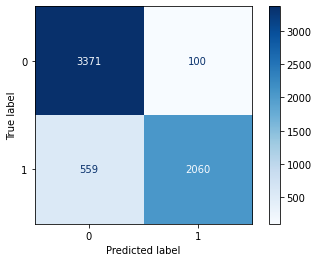

In [71]:
print_metrics(train_data['target'], pred, proba, lr, vectors)

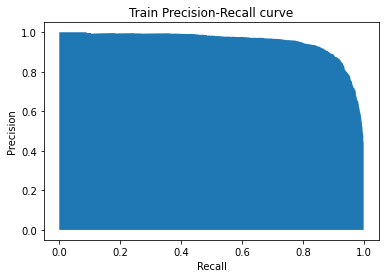

In [72]:
precision, recall, thresholds = precision_recall_curve(train_data['target'], proba)
plt.fill_between(recall, precision)
plt.ylabel("Precision")
plt.xlabel("Recall")
plt.title("Train Precision-Recall curve");

In [73]:
%%time

## Creating the vocabulary

test_texts = test_data['text_wdout_stop'].values
len(test_texts)

CPU times: user 193 µs, sys: 1 µs, total: 194 µs
Wall time: 200 µs


1523

In [74]:
test_vectors = tfidf.transform(test_texts)

In [75]:
test_pred = lr.predict(test_vectors)
test_proba = lr.predict_proba(test_vectors)[:,1]

AUC : 0.869, Accuracy 0.804 , F1 Score 0.744


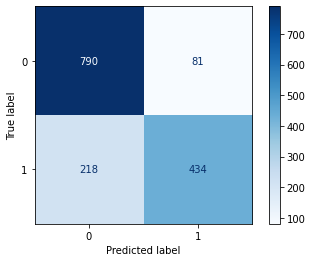

In [76]:
print_metrics(test_data['target'], test_pred, test_proba, lr, test_vectors)

### Conclusion

We see that for a logistic regression model, the metrics like accuracy, F1, and AUC is doing well on the training data. However, there is a drop in performance on test data. This mean the model is overfitting. We will look at some other modelling techniques and algorithms in the next notebook as I don't want to make this a very large notebook.